In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read the CSV file
df = pd.read_csv('Countries.csv')

In [25]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  194 non-null    object 
 1   country_long                             194 non-null    object 
 2   currency                                 194 non-null    object 
 3   capital_city                             194 non-null    object 
 4   region                                   194 non-null    object 
 5   continent                                194 non-null    object 
 6   demonym                                  194 non-null    object 
 7   latitude                                 194 non-null    float64
 8   longitude                                194 non-null    float64
 9   agricultural_land                        193 non-null    float64
 10  forest_area                              194 non-n

In [26]:
# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
       country                             country_long        currency  \
0  Afghanistan             Islamic State of Afghanistan  Afghan afghani   
1      Albania                      Republic of Albania    Albanian lek   
2      Algeria  People's Democratic Republic of Algeria  Algerian dinar   
3      Andorra                  Principality of Andorra            Euro   
4       Angola              People's Republic of Angola  Angolan kwanza   

       capital_city           region continent   demonym  latitude  longitude  \
0             Kabul    Southern Asia      Asia    Afghan      33.0       65.0   
1            Tirana  Southern Europe    Europe  Albanian      41.0       20.0   
2           Algiers  Northern Africa    Africa  Algerian      28.0        3.0   
3  Andorra la Vella  Southern Europe    Europe  Andorran      42.5        1.5   
4            Luanda    Middle Africa    Africa   Angolan     -12.5       18.5   

   agricultural_land  ...  popu

In [27]:
# Display summary statistics
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
         latitude   longitude  agricultural_land   forest_area     land_area  \
count  194.000000  194.000000       1.930000e+02  1.940000e+02  1.940000e+02   
mean    18.975601   22.027491       2.454551e+05  2.086784e+05  6.675087e+05   
std     23.876225   66.396389       6.356268e+05  7.824926e+05  1.837107e+06   
min    -41.000000 -175.000000       4.000000e+00  0.000000e+00  2.027000e+00   
25%      4.000000   -5.000000       6.464000e+03  3.331775e+03  2.355250e+04   
50%     16.583333   21.500000       3.872780e+04  2.528925e+04  1.203750e+05   
75%     40.000000   50.162500       2.150000e+05  1.236735e+05  5.237000e+05   
max     65.000000  178.000000       5.285080e+06  8.153120e+06  1.637690e+07   

         rural_land     urban_land  central_government_debt_pct_gdp  \
count  1.940000e+02     194.000000                       120.000000   
mean   6.563711e+05    9777.116531                        66.759366   
std    1.811169e+06   42301.458421            

In [28]:
# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Missing values:
country             0
country_long        0
currency            0
capital_city        0
region              0
                   ..
democracy_score     0
democracy_type      0
median_age          0
political_leader    7
title               7
Length: 64, dtype: int64


Number of outliers in GDP: 22
Top 5 GDP outliers:
           country           gdp
184  United States  2.546270e+13
34           China  1.796320e+13
83           Japan  4.231140e+12
63         Germany  4.072190e+12
75           India  3.385090e+12


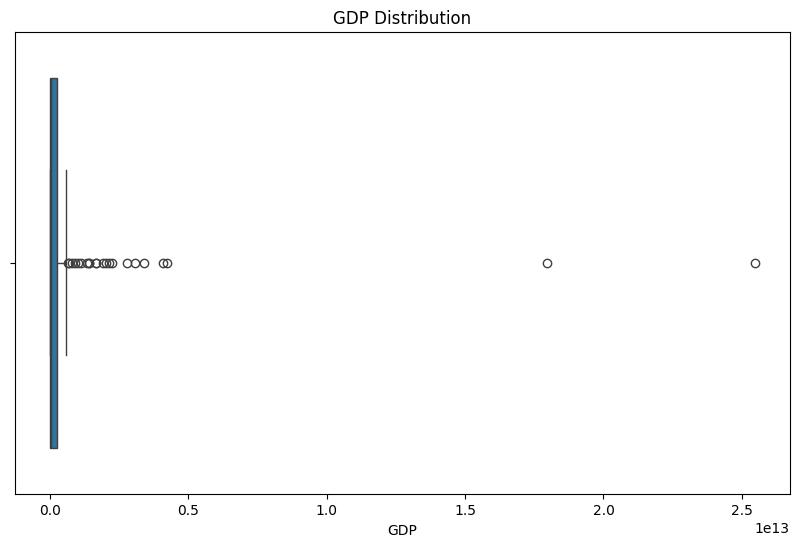

Summary statistics after handling missing values:
         latitude   longitude  agricultural_land   forest_area     land_area  \
count  194.000000  194.000000       1.940000e+02  1.940000e+02  1.940000e+02   
mean    18.975601   22.027491       2.443895e+05  2.086784e+05  6.675087e+05   
std     23.876225   66.396389       6.341517e+05  7.824926e+05  1.837107e+06   
min    -41.000000 -175.000000       4.000000e+00  0.000000e+00  2.027000e+00   
25%      4.000000   -5.000000       6.522175e+03  3.331775e+03  2.355250e+04   
50%     16.583333   21.500000       3.872780e+04  2.528925e+04  1.203750e+05   
75%     40.000000   50.162500       2.142500e+05  1.236735e+05  5.237000e+05   
max     65.000000  178.000000       5.285080e+06  8.153120e+06  1.637690e+07   

         rural_land     urban_land  central_government_debt_pct_gdp  \
count  1.940000e+02     194.000000                       194.000000   
mean   6.563711e+05    9777.116531                        62.436654   
std    1.811169e

In [29]:
# Handle missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Identify outliers in GDP
gdp_outliers = identify_outliers(df, 'gdp')

print("Number of outliers in GDP:", len(gdp_outliers))
print("\
Top 5 GDP outliers:")
print(gdp_outliers[['country', 'gdp']].sort_values('gdp', ascending=False).head())

# Visualize GDP distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gdp'])
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.show()

# Print summary statistics after handling missing values
print("\
Summary statistics after handling missing values:")
print(df[numeric_columns].describe())

# Check remaining missing values
print("\
Remaining missing values:")
print(df.isnull().sum())

In [30]:
# Handle outliers using capping (winsorization)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# List of numerical columns to process
numerical_columns = ['latitude', 'longitude', 'agricultural_land', 'forest_area', 'land_area', 
                     'rural_land', 'urban_land', 'central_government_debt_pct_gdp', 'expense_pct_gdp', 
                     'gdp', 'inflation', 'self_employed_pct', 'tax_revenue_pct_gdp', 'unemployment_pct', 
                     'vulnerable_employment_pct', 'electricity_access_pct', 'alternative_nuclear_energy_pct']

# Cap outliers for all numerical columns
for col in numerical_columns:
    df = cap_outliers(df, col)

# Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display summary statistics after preprocessing
print("Summary statistics after preprocessing:")
print(df[numerical_columns].describe())

# Save preprocessed data
df.to_csv('preprocessed_countries.csv', index=False)
print("\
Preprocessed data saved to 'preprocessed_countries.csv'")

# Display the first few rows of the preprocessed data
print("\
First few rows of preprocessed data:")
print(df[['country'] + numerical_columns].head())

Summary statistics after preprocessing:
           latitude     longitude  agricultural_land   forest_area  \
count  1.940000e+02  1.940000e+02       1.940000e+02  1.940000e+02   
mean   9.156479e-17 -5.493887e-17       4.578239e-17  5.036063e-17   
std    1.002587e+00  1.002587e+00       1.002587e+00  1.002587e+00   
min   -2.518437e+00 -1.813574e+00      -7.613053e-01 -7.605660e-01   
25%   -6.288409e-01 -4.377073e-01      -7.242144e-01 -7.275556e-01   
50%   -1.004538e-01  2.935799e-03      -5.409520e-01 -5.100060e-01   
75%    8.828362e-01  4.795370e-01       4.578369e-01  4.647623e-01   
max    1.932612e+00  1.855403e+00       2.230914e+00  2.253239e+00   

          land_area    rural_land    urban_land  \
count  1.940000e+02  1.940000e+02  1.940000e+02   
mean   1.487928e-17 -3.433679e-17 -2.071653e-16   
std    1.002587e+00  1.002587e+00  1.002587e+00   
min   -7.969689e-01 -8.042327e-01 -9.051530e-01   
25%   -7.423120e-01 -7.511500e-01 -7.982475e-01   
50%   -5.176024e-01 -5.

# Load the data that work it after preprocessed_countries

In [31]:

df = pd.read_csv('preprocessed_countries.csv')

In [32]:
# Select features and target
features = ['latitude', 'longitude', 'agricultural_land', 'forest_area', 'land_area', 
            'rural_land', 'urban_land', 'central_government_debt_pct_gdp', 'expense_pct_gdp', 
            'inflation', 'self_employed_pct', 'tax_revenue_pct_gdp', 'unemployment_pct', 
            'vulnerable_employment_pct', 'electricity_access_pct', 'alternative_nuclear_energy_pct']
target = 'gdp'

# Remove rows where the target variable is missing
df = df.dropna(subset=[target])

In [33]:
# Impute missing values in features
imputer = SimpleImputer(strategy='median')
df[features] = imputer.fit_transform(df[features])

# Feature engineering
df['urban_rural_ratio'] = df['urban_land'] / df['rural_land']
df['gdp_per_land_area'] = df[target] / df['land_area']
features += ['urban_rural_ratio', 'gdp_per_land_area']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Model Performance:
Mean Squared Error: 0.25786214106724603
R-squared Score: 0.7541019531233253
Top 5 Important Features:
              feature  importance
6          urban_land    0.674741
17  gdp_per_land_area    0.125070
4           land_area    0.048177
10  self_employed_pct    0.037367
3         forest_area    0.017907


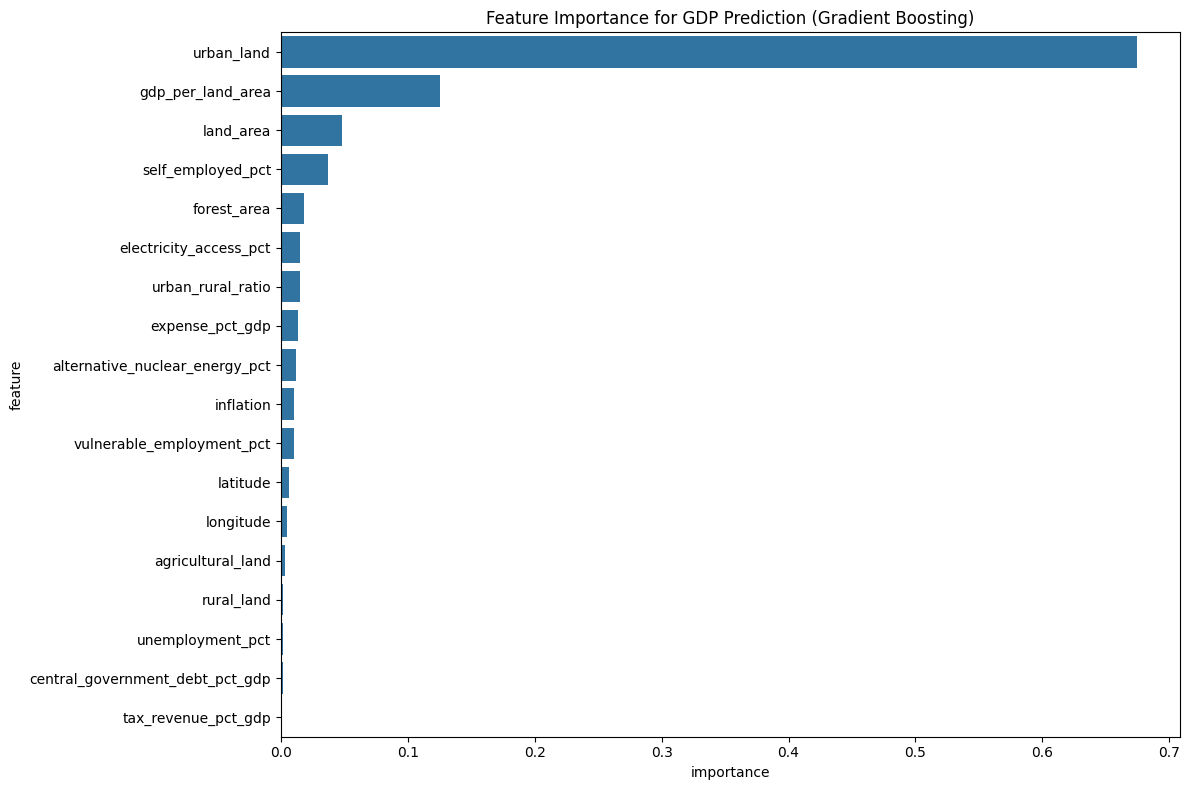

Average GDP by Region:
region
Tropical   -8.698655e-17
Southern             NaN
Northern             NaN
Name: gdp, dtype: float64


C:\Users\fahad\AppData\Local\Temp\ipykernel_2172\2526620045.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_gdp = df.groupby('region')[target].mean().sort_values(ascending=False)


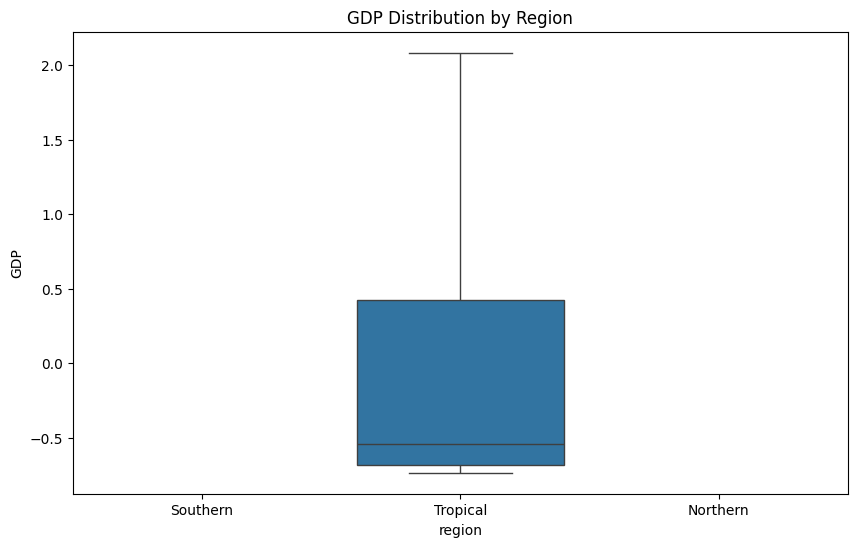

Correlations with GDP:
gdp                       1.000000
electricity_access_pct    0.354388
inflation                -0.026824
unemployment_pct         -0.215613
Name: gdp, dtype: float64


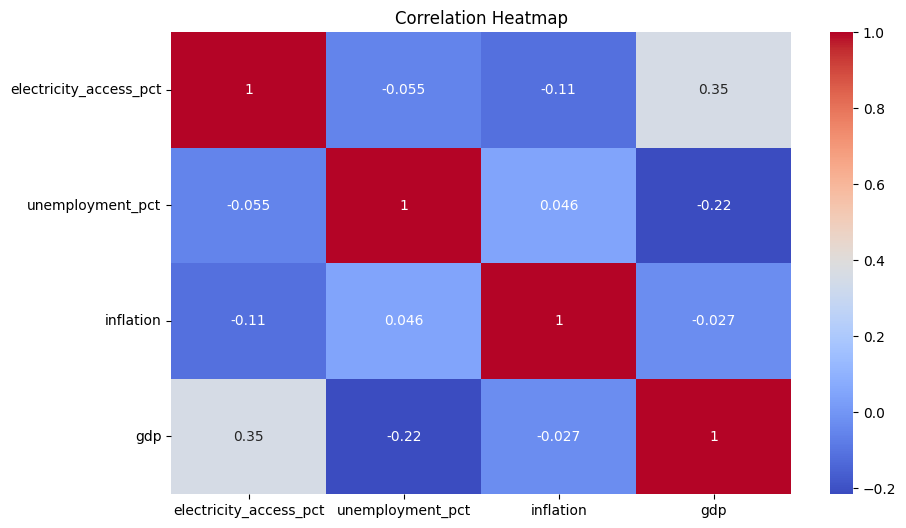

In [35]:
# Train a Gradient Boosting Regressor with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Make predictions
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\
Top 5 Important Features:")
print(feature_importance.head())

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for GDP Prediction (Gradient Boosting)')
plt.tight_layout()
plt.show()

# Analyze specific regions
df['region'] = pd.cut(df['latitude'], bins=[-90, -30, 30, 90], labels=['Southern', 'Tropical', 'Northern'])
region_gdp = df.groupby('region')[target].mean().sort_values(ascending=False)

print("\
Average GDP by Region:")
print(region_gdp)

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y=target, data=df)
plt.title('GDP Distribution by Region')
plt.ylabel('GDP')
plt.show()

# Investigate other target variables
other_targets = ['electricity_access_pct', 'unemployment_pct', 'inflation']
correlations = df[other_targets + [target]].corr()[target].sort_values(ascending=False)

print("\
Correlations with GDP:")
print(correlations)

plt.figure(figsize=(10, 6))
sns.heatmap(df[other_targets + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

GDP Statistics for African Countries:
count    54.000000
mean     -0.483340
std       0.488947
min      -0.733976
25%      -0.710240
50%      -0.661586
75%      -0.521460
max       1.474263
Name: gdp, dtype: float64


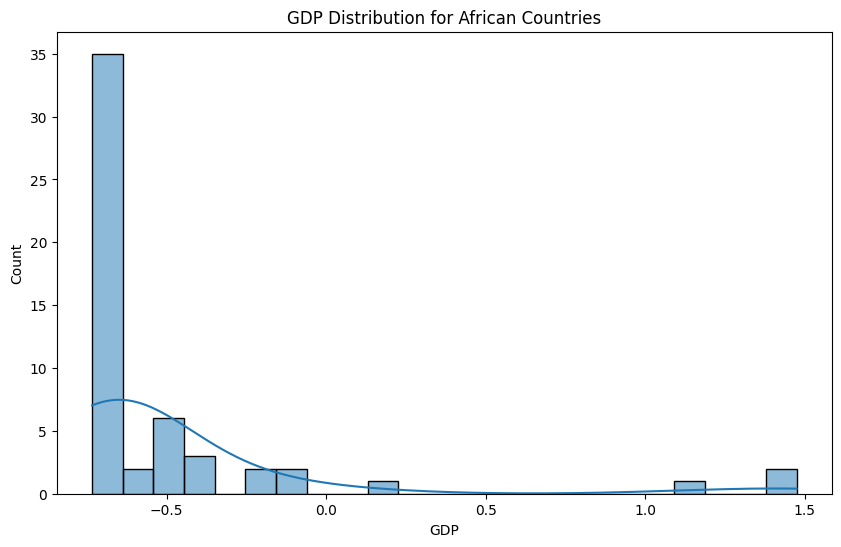

In [36]:
# Example: Analyzing GDP for African countries
africa = df[df['continent'] == 'Africa']
africa_gdp_stats = africa['gdp'].describe()

print("GDP Statistics for African Countries:")
print(africa_gdp_stats)

# Visualize GDP distribution for Africa
plt.figure(figsize=(10, 6))
sns.histplot(africa['gdp'], kde=True)
plt.title('GDP Distribution for African Countries')
plt.xlabel('GDP')
plt.show()

Correlations between GDP and Economic Indicators:
gdp                       1.000000
electricity_access_pct    0.354388
tax_revenue_pct_gdp       0.007839
inflation                -0.026824
unemployment_pct         -0.215613
Name: gdp, dtype: float64


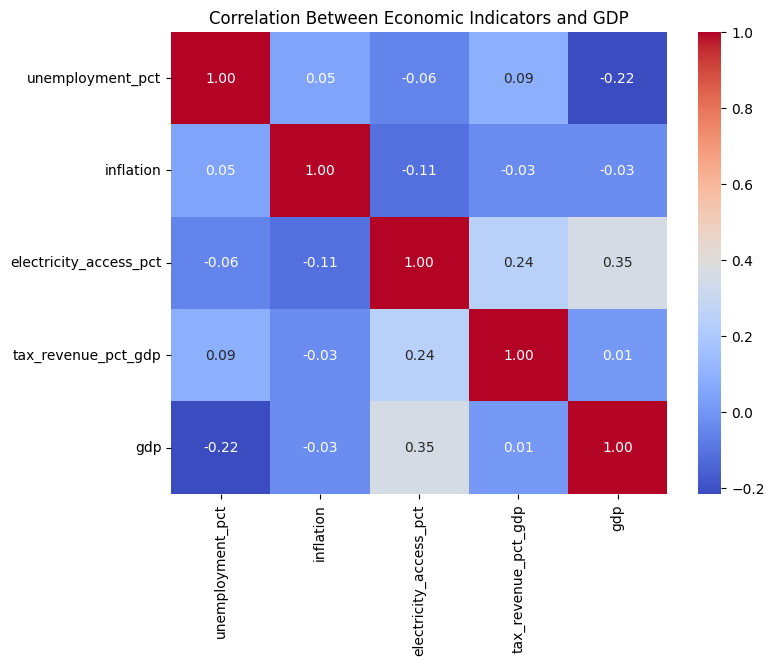

In [37]:
# Correlation between GDP and other economic indicators
economic_indicators = ['unemployment_pct', 'inflation', 'electricity_access_pct', 'tax_revenue_pct_gdp']
correlations = df[economic_indicators + ['gdp']].corr()

print("Correlations between GDP and Economic Indicators:")
print(correlations['gdp'].sort_values(ascending=False))

# Heatmap for visualizing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Economic Indicators and GDP')
plt.show()

**Exploring Relationships Between Different Variables**

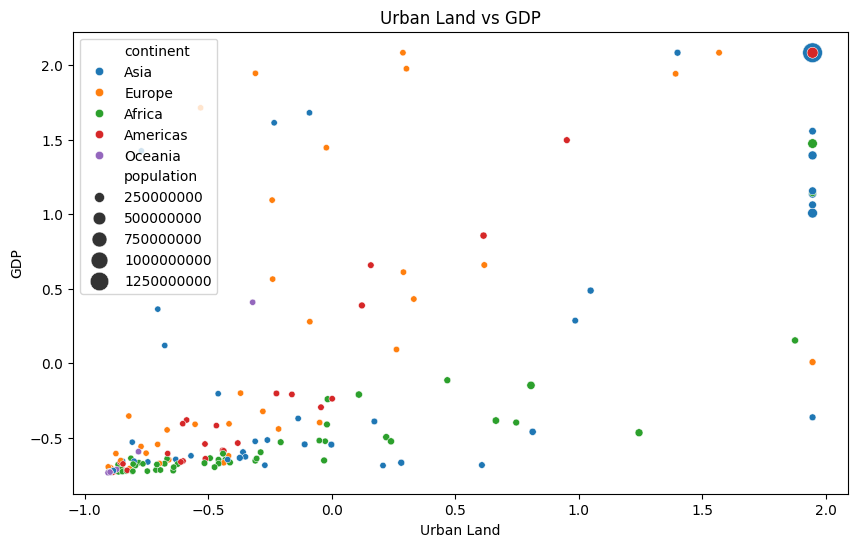

In [38]:
# Scatter plot of urbanization vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='urban_land', y='gdp', data=df, hue='continent', size='population', sizes=(20, 200))
plt.title('Urban Land vs GDP')
plt.xlabel('Urban Land')
plt.ylabel('GDP')
plt.show()

# Trying Other Machine Learning Models

In [39]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Train a RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate both models
rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")

Random Forest MSE: 0.280870463444237
XGBoost MSE: 0.23344397349220328


In [40]:
import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, 'best_gb_model.pkl')

# Optionally, save other models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [41]:
# Load the model later for predictions or further use
loaded_gb_model = joblib.load('best_gb_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_xgb_model = joblib.load('xgboost_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_gb_model.predict(X_test_scaled)
